# PCA

## Теоретическая часть

## Задача 1

Когда $p$ сильно больше $n$ разумнее рассматривать симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

# Матрица и нахождение собственных чисел и векторов

In [ ]:
import numpy as np
np.set_printoptions(precision=9, suppress=True)

# Шаг 1: Создаем конкретную матрицу X
X = np.array([
    [1, 2, 3],
    [4, 5, 6]], dtype=float)

print("X:")
print(X)

print("\nX.T:")
print(X.T)

# Шаг 2: Вычисляем X^T X
XXT = X @ X.T

print("\nXX.T:")
print(XXT)

print("\nXXT.T:")
print(XXT.T)

X:
[[1. 2. 3.]
 [4. 5. 6.]]

X.T:
[[1. 4.]
 [2. 5.]
 [3. 6.]]

XX.T:
[[14. 32.]
 [32. 77.]]

XXT.T:
[[14. 32.]
 [32. 77.]]


Находим собственные числа и собственные векторы $XX^T$:

In [ ]:
np.set_printoptions(precision=6, suppress=True)

eigenvalues, U = np.linalg.eig(XXT)

print("Собственные значения:")
print(eigenvalues)

print("\nСобственные векторы:")
print(U)

# 3. Проверка ортогональности собственных векторов
# Скалярные произведения между векторами

dot_v1_v2 = np.dot(U[:, 0], U[:, 1])
print(f"\nСкалярное произведение v1 и v2: {dot_v1_v2:.2f}")

if dot_v1_v2 == 0:
  print(f"\nВекторы ортогональны")


I = U.T  @ U

print('\nI = U.T  @ U')
print(I)

Собственные значения:
[ 0.597327 90.402673]

Собственные векторы:
[[-0.922366 -0.386318]
 [ 0.386318 -0.922366]]

Скалярное произведение v1 и v2: 0.00

Векторы ортогональны

I = U.T  @ U
[[1. 0.]
 [0. 1.]]


Cобственное значение 𝜆=90.402673 намного больше другой 𝜆
Это означает, что первое направление (главная компонента) объясняет почти всю вариативность данных.

$$
U^TXX^TU = \Lambda,
$$

Если мы уже знаем, что $XX^TU = U Λ$,

то если мы домножим спереди обе части на $U^T$,

то получим $U^TXX^TU=U^TU Λ$

A $U^TU = I$

In [ ]:
Lambda = U.T @ XXT @ U

print("Lambda = U.T x XX.T x U:\n")
print(Lambda)

I = U.T  @ U
print("\nI:\n")
print(I)

Lambda = U.T x XX.T x U:

[[ 0.597327 -0.      ]
 [ 0.       90.402673]]

I:

[[1. 0.]
 [0. 1.]]


In [ ]:
U @ U.T

array([[1., 0.],
       [0., 1.]])

$$
XX^TU = U \Lambda,
$$

$U^TXX^TU = \Lambda$ домножаем на $U$, получаем $UU^TXX^TU = U\Lambda$, а $UU^T = I$


In [ ]:
print("XXT @  U")
print(XXT @  U)

print("\nU @ Lambda")
print(U @ Lambda)

XXT @  U
[[ -0.550954 -34.924153]
 [  0.230758 -83.384332]]

U @ Lambda
[[ -0.550954 -34.924153]
 [  0.230758 -83.384332]]


$ XX^TU = U \Lambda$ равенство подтверждает, что матрица $ XX^T$ имеет собственные значения и собственные векторы, и что при умножении $ XX^T$ на собственные векторы $U$ мы получаем соответствующие собственные значения $\Lambda$.

$$
X^TXX^TU = X^TU \Lambda,
$$

$XX^TU = U \Lambda$ домноожаем на $X^T$ и получаем $X^TXX^TU = X^TU \Lambda$

In [ ]:
print("X.T * X * X.T *  U")
print(X.T @ X @ X.T @  U)

print("X.T * U * Lambda")
print(X.T @ U @ Lambda)

X.T * X * X.T *  U
[[   0.372078 -368.461479]
 [   0.051882 -486.769963]
 [  -0.268314 -605.078448]]
X.T * U * Lambda
[[   0.372078 -368.461479]
 [   0.051882 -486.769963]
 [  -0.268314 -605.078448]]


Равенство  $X^TXX^TU = X^TU \Lambda$ показывает, что умножение матрицы данных
$ X^TX$ на собственные векторы  $U$ эквивалентно умножению этих векторов на соответствующие собственные значения
$\Lambda$, что подтверждает их роль в разложении матрицы $ X^TX$ .

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

Группируем $X^TXX^TU = X^TU \Lambda$ и получаем $(X^TX)(X^TU) = (X^TU)\Lambda$

Это идентично $XX^TU = U Λ$, а значит $(X^TU)$ собственные векторы для $(X^TX)$

In [ ]:
print(X.T @ X)

print(X.T @ U)


print("(X.T @ X) @ ( X.T @ U)")
print((X.T @ X) @ ( X.T @ U))


print("X.T @ U @ Lambda")
print(X.T @ U @ Lambda)

[[17. 22. 27.]
 [22. 29. 36.]
 [27. 36. 45.]]
[[ 0.622905 -4.075781]
 [ 0.086857 -5.384464]
 [-0.449191 -6.693148]]
(X.T @ X) @ ( X.T @ U)
[[   0.372078 -368.461479]
 [   0.051882 -486.769963]
 [  -0.268314 -605.078448]]
X.T @ U @ Lambda
[[   0.372078 -368.461479]
 [   0.051882 -486.769963]
 [  -0.268314 -605.078448]]


### Матрицы $X^TU$ ортогональны, но не ортонормированы.

$X^TU$ ортогональая матрица, если скалярные произведения $(u_1,u_2)=0$

Но $X^TU$ не ортонормированная, если скалярные произведения $(u_1,u_1) != 1$,

то есть матрица не $I$, а $\Lambda$, с собственными числа на диагонали.

In [ ]:
XTU = X.T @ U
print(XTU)

[[ 0.622905 -4.075781]
 [ 0.086857 -5.384464]
 [-0.449191 -6.693148]]


In [ ]:
print( ( X.T @ U).T @ ( X.T @ U))

[[ 0.597327  0.      ]
 [ 0.       90.402673]]


### Нормы столбцов $X^TU$

In [ ]:
XTU = X.T @ U
print(XTU)

# Нормы столбцов X^T U
column_norms = np.linalg.norm(XTU, axis=0)
print("\nНормы столбцов X^T U:")
print(column_norms)

[[ 0.622905 -4.075781]
 [ 0.086857 -5.384464]
 [-0.449191 -6.693148]]

Нормы столбцов X^T U:
[0.77287  9.508032]


### Преобразование к ортогональному. Получить аналог `PCA`.

In [ ]:
# Шаг 7: Нормализация столбцов X^T U для получения ортонормальной матрицы
XTU_orthonormal = XTU / column_norms

print("\nОртонормированная матрица X^T U:")
print(XTU_orthonormal)

# Проверяем, что столбцы X^T U теперь ортонормированы
orthogonality_check = XTU_orthonormal.T @ XTU_orthonormal
print("\nПроизведение X^T U ортонормированной на её транспонированную (должно быть единичной):")
print(orthogonality_check)


Ортонормированная матрица X^T U:
[[ 0.805964 -0.428667]
 [ 0.112382 -0.566307]
 [-0.581199 -0.703947]]

Произведение X^T U ортонормированной на её транспонированную (должно быть единичной):
[[1. 0.]
 [0. 1.]]


Связь между $ X X^T$ и $X^TU$:

Собственные векторы матрицы $ X X^T $ - $U$ связаны с собственными векторами матрицы $X^TX$ следующим образом:

1. Если $ U$ — это собственные векторы матрицы $X X^T$ , то $ V = X^T U$ (нормализованные столбцы) будут собственными векторами $X^TX$.
2. Собственные векторы $ V$ можно использовать для проекций исходных данных.
знаков.

In [ ]:
Z_PCA = X @ XTU_orthonormal

print('Координаты Z в новом пространстве:')
print(Z_PCA)

Координаты Z в новом пространстве:
[[-0.712869 -3.673121]
 [ 0.298573 -8.769883]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(-0.5, 419.5, 279.5, -0.5)

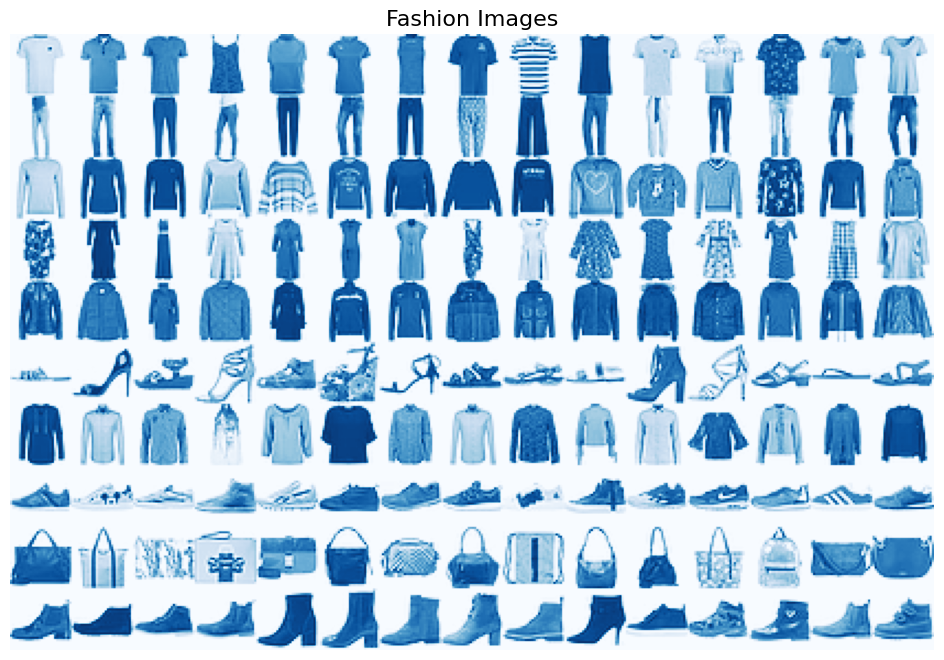

In [ ]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [ ]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Обучение модели LogisticRegression
model = LogisticRegression(max_iter=2000, tol=0.001)
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели с помощью f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1}")

Weighted F1-score: 0.7451025098831728


---

**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

---

**Ваш ответ:**

Метрика **F1-score** является важной метрикой в задачах классификации, которая учитывает как **точность (precision)**, так и **полноту (recall)** модели. Важно, что она является гармоническим средним этих двух метрик.

### 1. **Как работает F1-score:**
F1-score вычисляется как:
$
F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}
$
где:
- **Точность (precision)** — это доля верных положительных предсказаний среди всех положительных предсказаний:
$$
  precision = \frac{TP}{TP + FP}
$$
  где \( TP \) — количество истинно положительных, а \( FP \) — количество ложноположительных.

- **Полнота (recall)** — это доля верных положительных предсказаний среди всех фактических положительных примеров:
$$
  recall = \frac{TP}{TP + FN}
$$
  где \( TP \) — количество истинно положительных, а \( FN \) — количество ложноположительных.

- **F1-score** — это метрика, которая помогает сбалансировать точность и полноту. Если модель имеет хороший баланс между этими двумя параметрами, F1-score будет высок.

### 2. **Параметр `average='weighted'`:**

Этот параметр используется, когда задача имеет **несбалансированные классы**. В таком случае важно учитывать веса каждого класса при вычислении метрики.

- **`average='weighted'`** — это метод, который вычисляет **взвешенное среднее** F1-score для каждого класса, где веса пропорциональны количеству экземпляров каждого класса. Это помогает модели учесть частоту классов в наборе данных.

Eсли есть два класса, и один из них встречается гораздо чаще, чем другой, то F1-score будет взвешен так, чтобы модель учитывала более важные классы, которые встречаются чаще.

### 3. **Другие параметры для `average`:**

- **`average='micro'`**:
  - Это микросреднее, которое рассчитывает глобальные показатели, учитывая все ошибки и успешные классификации. В отличие от `weighted`, которое учитывает частоту классов, `micro` использует общие статистики по всем классам.
  - Это подходит, когда вы хотите оценить общую эффективность модели, игнорируя частоту классов.

- **`average='macro'`**:
  - Это макросреднее, которое рассчитывает F1-score для каждого класса отдельно, а затем берет среднее, не взвешивая по количеству наблюдений.
  - Это полезно, если вам важен баланс в производительности по всем классам, независимо от их частоты.

- **`average=None`**:
  - Если вы указываете `average=None`, то функция вернет F1-score для каждого класса отдельно. Это полезно, если вы хотите получить подробную информацию по каждому классу.

### 4. **Когда использовать какой параметр average:**
- **`average='weighted'`**: Используйте, если у вас несбалансированные данные и вы хотите учесть различия в частоте классов при вычислении F1-score.
- **`average='micro'`**: Используйте, если хотите учитывать общую производительность модели по всем классам, не принимая во внимание их частоты.
- **`average='macro'`**: Используйте, если важно, чтобы модель показывала хороший результат по каждому классу, независимо от его частоты.
- **`average=None`**: Используйте, если вам нужно получить F1-score для каждого класса отдельно.


---

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

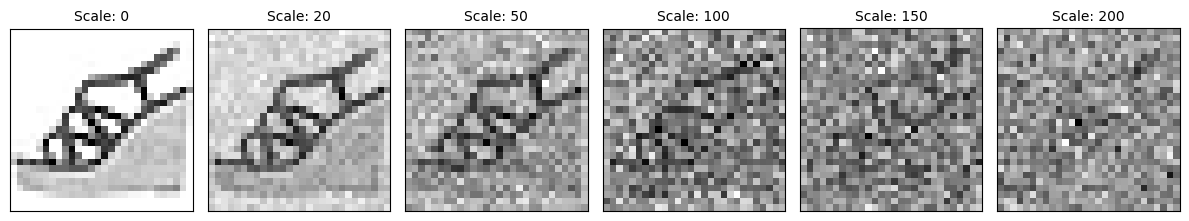

In [ ]:
scales = [0, 20, 50, 100, 150, 200]

# Создаем фигуру для отображения результатов
fig, axes = plt.subplots(1, len(scales), figsize=(12, 5), subplot_kw={'xticks': [], 'yticks': []})

# Добавляем шум для каждого уровня из scales и визуализируем
for scale, ax in zip(scales, axes):
    # Добавляем шум только к первой картинке
    X_test_noisy = X_test[1] + np.random.normal(0, scale, X_test[1].shape)
    # Визуализируем изображение с текущим уровнем шума
    ax.imshow(X_test_noisy.reshape(28, 28), cmap=plt.cm.gray_r)
    ax.set_title(f"Scale: {scale}", fontsize=10)

# Показываем изображение
plt.tight_layout()
plt.show()

- Для маленького масштаба (например, 20-50) шум незначителен и на изображениях всё ещё можно различить основные объекты.

- При большом масштабе (например, 200) шум становится сильным и искажает пиксели значительно, что затрудняет распознавание объектов на изображениях.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
scales = [0, 20, 50, 100, 150, 200]

for scale in scales:
  # Добавляем шум для каждого уровня из scales
  X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)

# Оценка модели на зашумленных данных
  y_pred_noisy = model.predict(X_test_noisy)
  f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')
  print(f"Weighted F1-score for scale {scale}: {f1_noisy}")

Weighted F1-score for scale 0: 0.7451025098831728
Weighted F1-score for scale 20: 0.6676835445758147
Weighted F1-score for scale 50: 0.5119398106758518
Weighted F1-score for scale 100: 0.34791681065509183
Weighted F1-score for scale 150: 0.27662880888481706
Weighted F1-score for scale 200: 0.2324969187899534


---
**Ваши выводы:**

Значение Weighted F1-score уменьшается по мере увеличения уровня шума (scale).

Это ожидаемый результат, так как добавление шума искажает данные, делая их менее различимыми для модели классификации. Соответственно, точность и полнота предсказаний снижаются.

---

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

In [ ]:
from sklearn.decomposition import PCA

variance = np.arange(0.1, 1.0, 0.1)

for el in variance:
  pca = PCA(el, random_state=0).fit(X_test_noisy)
  pca.n_components_



In [ ]:
  tr = pca.transform(MNIST_noisy)
  un_tr = pca.inverse_transform(tr)
variance

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scales = [0, 50, 100, 150, 200]

# Добавляем шум к данным
noisy_data = [X_test + np.random.normal(0, scale, X_test.shape) for scale in scales]

explained_variances = np.arange(0.1, 1.0, 0.1)

fig, axes = plt.subplots(len(scales), len(explained_variances), figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, scale_data in enumerate(noisy_data):
    for j, var in enumerate(explained_variances):
        # Настраиваем PCA с заданной explained_variance
        pca = PCA(var)
        reduced_data = pca.fit_transform(scale_data)  # Уменьшение размерности
        restored_data = pca.inverse_transform(reduced_data)  # Восстановление данных

        # Визуализируем восстановленное первое изображение
        axes[i, j].imshow(restored_data[0].reshape(28, 28), cmap=plt.cm.gray_r)
        axes[i, j].set_title(f"Var {var:.1f}", fontsize=8)


# Оформление графика
plt.tight_layout()
plt.show()

NameError: name 'X_test' is not defined

---
**Ваши выводы:**

- При **отсутсвии или небольшом уровне шума** в 1-2 строках видно, что **при увеличении explained_variance** и восстановлении в данных большего числа компонент, качество картинки значительно **улучшается**.

На картинках с explained_variance больше 0.6-0.7 уже отчетливо видно изображение.



- На изображениях, куда было добавлено **много шума**, на 3-5 строках видно, что при **увеличении explained_variance** все **больше шума восстанавливается**.

Компоненты, которые объясняют меньшую часть дисперсии, чаще содержат незначительные детали или шум. Когда explained_variance увеличивается, добавляются эти компоненты, которые вносят больше искажений.

---

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

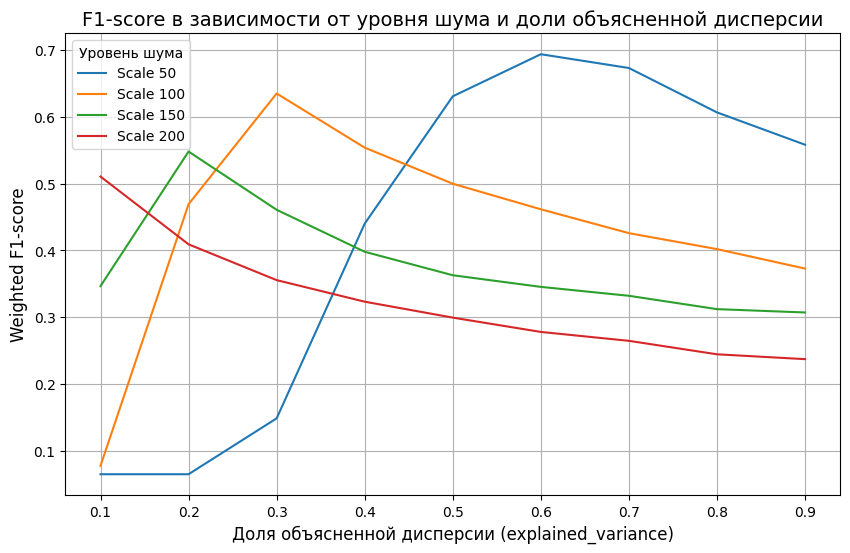

Результаты F1-score:
            Var 0.1   Var 0.2   Var 0.3   Var 0.4   Var 0.5   Var 0.6  \
Scale 50   0.064534  0.064534  0.148246  0.439959  0.630704  0.693754   
Scale 100  0.077117  0.469112  0.634935  0.553792  0.499730  0.461437   
Scale 150  0.346391  0.547957  0.460694  0.397797  0.362630  0.345199   
Scale 200  0.510480  0.408943  0.355320  0.323009  0.299156  0.277710   

            Var 0.7   Var 0.8   Var 0.9  
Scale 50   0.673095  0.606590  0.558160  
Scale 100  0.425697  0.401784  0.372643  
Scale 150  0.331844  0.311858  0.306862  
Scale 200  0.264368  0.244200  0.236928  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# Данные
scales = [50, 100, 150, 200]
explained_variances = np.arange(0.1, 1.0, 0.1)

# Обученная модель LogisticRegression
model = LogisticRegression(max_iter=2000, tol=0.001)
model.fit(X_train, y_train)

# Результаты F1-score
f1_results = np.zeros((len(scales), len(explained_variances)))

# Генерация шума, применение PCA и предсказания
for i, scale in enumerate(scales):
    # Добавляем шум к данным
    X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)

    for j, var in enumerate(explained_variances):
        # PCA для текущего уровня объясненной дисперсии
        pca = PCA(var)
        reduced_data = pca.fit_transform(X_test_noisy)
        restored_data = pca.inverse_transform(reduced_data)

        # Предсказания для восстановленных данных
        y_pred = model.predict(restored_data)

        # Расчет F1-score
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_results[i, j] = f1


# Визуализация результатов
fig, ax = plt.subplots(figsize=(10, 6))

for i, scale in enumerate(scales):
    ax.plot(explained_variances, f1_results[i], label=f"Scale {scale}")

ax.set_title("F1-score в зависимости от уровня шума и доли объясненной дисперсии", fontsize=14)
ax.set_xlabel("Доля объясненной дисперсии (explained_variance)", fontsize=12)
ax.set_ylabel("Weighted F1-score", fontsize=12)
ax.legend(title="Уровень шума", fontsize=10)
plt.grid(True)
plt.show()

# Вывод таблицы
import pandas as pd

results_df = pd.DataFrame(f1_results, columns=[f"Var {var:.1f}" for var in explained_variances], index=[f"Scale {scale}" for scale in scales])
print("Результаты F1-score:")
print(results_df)

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

---
**Ваши выводы:**

- Scale 50:

**Наименьший уровень шума**, F1-score растет с увеличением explained_variance до значения 0.6, достигая своего максимума (0.693754). После этого качество классификации немного снижается.

При низкой доле объясненной дисперсии (Var 0.1-0.2), модель не способна восстановить информацию из данных, поэтому F1-score низкий.

- Scale 100:

На **умеренном уровне шума** F1-score выше для значений Var 0.2-0.3 (до 0.634935).

Однако при увеличении explained_variance от 0.3 и выше качество снижается, так как модель начинает включать больше шума.

- Scale 150:

При **высоком уровне шума** F1-score остается умеренным только при Var 0.2-0.3 (до 0.547957). При Var 0.4 и выше шум начинает доминировать, снижая качество восстановления данных и классификации.

- Scale 200:

При **самом высоком уровне шума** F1-score остается **на низком уровне** независимо от explained_variance. Максимум (0.510480) достигается при Var 0.1, так как дальнейшее увеличение объясненной дисперсии включает больше шума.

---

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [ ]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

# Функция для вычисления вероятностей p_ij в высокоразмерном пространстве
def compute_pij(X, sigma=1.0):
    """
    X - входные данные, размерность (n, d)
    sigma - параметр для контроля "ширины" гауссовой функции
    """
    # Вычисление евклидовых расстояний между точками (n x n матрица)
    dists = pairwise_distances(X, metric='euclidean')  # Размерность (n, n)

    # Вычисление экспоненциальных значений для расстояний
    pij = np.exp(-dists ** 2 / (2 * sigma ** 2))  # Размерность (n, n)

    # Нормализуем строки так, чтобы сумма вероятностей по каждой строке была 1
    pij = pij / pij.sum(axis=1, keepdims=True)  # Размерность (n, n)

    # Диагональные элементы (вероятности для самих себя) должны быть равны 0
    np.fill_diagonal(pij, 0)  # Размерность (n, n)

    return pij

# Инициализация точек в 2D пространстве (например, случайные значения)
Y = np.random.randn(X.shape[0], 2)  # Размерность (n, 2)

def compute_qij(Y):
    """
    Y - низкоразмерные данные, размерность (n, 2)
    """
    # Вычисление евклидовых расстояний между точками в низкоразмерном пространстве
    dists = pairwise_distances(Y, metric='euclidean')  # Размерность (n, n)

    # Вычисление вероятностей q_ij
    qij = np.exp(-dists ** 2)  # Размерность (n, n)

    # Нормализация, чтобы сумма вероятностей по каждой строке была 1
    qij = qij / qij.sum(axis=1, keepdims=True)  # Размерность (n, n)

    # Диагональные элементы (для самих себя) должны быть равны 0
    np.fill_diagonal(qij, 0)  # Размерность (n, n)

    return qij

def compute_loss(P, Q):
    """
    P - вероятности p_ij в высокоразмерном пространстве (n, n)
    Q - вероятности q_ij в низкоразмерном пространстве (n, n)
    """
    # Вычисление функции потерь (Кульбак-Лейблер)
    loss = np.sum(P * np.log(P / (Q + 1e-8)))  # Добавляем малое значение для предотвращения деления на 0
    return loss


def compute_gradient(Y, P, Q):
    """
    Y - низкоразмерные данные (n, 2)
    P - вероятности p_ij в высокоразмерном пространстве (n, n)
    Q - вероятности q_ij в низкоразмерном пространстве (n, n)
    """
    gradient = np.zeros_like(Y)  # Инициализация градиента с теми же размерами, что и Y

    for i in range(Y.shape[0]):
        for j in range(Y.shape[0]):
            if i != j:
                diff = Y[i] - Y[j]  # Разница между координатами точек в 2D
                gradient[i] += 4 * (P[i, j] - Q[i, j]) * diff * Q[i, j]

    return gradient


from scipy.optimize import minimize

# Функция для вычисления градиентов и потерь в одном вызове (для минимизации)
def loss_and_grad(Y_flat, X, P):
    Y = Y_flat.reshape(-1, 2)  # Преобразуем одномерный массив обратно в двумерный (n, 2)

    # Вычисление вероятностей q_ij в низкоразмерном пространстве
    Q = compute_qij(Y)

    # Вычисление функции потерь
    loss = compute_loss(P, Q)

    # Вычисление градиента
    gradient = compute_gradient(Y, P, Q)

    return loss, gradient.flatten()  # Возвращаем потерю и градиент в виде одномерного массива

# Инициализация точек в 2D пространстве случайными значениями
Y_init = np.random.randn(X.shape[0] * 2)  # Преобразуем (n, 2) в одномерный массив

# Минимизация функции потерь
result = minimize(loss_and_grad, Y_init, args=(data, P), jac=True, method='L-BFGS-B', options={'maxiter': 1000})

# Получаем оптимизированные координаты точек
Y_opt = result.x.reshape(-1, 2)  # Оптимизированные координаты в 2D пространстве

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


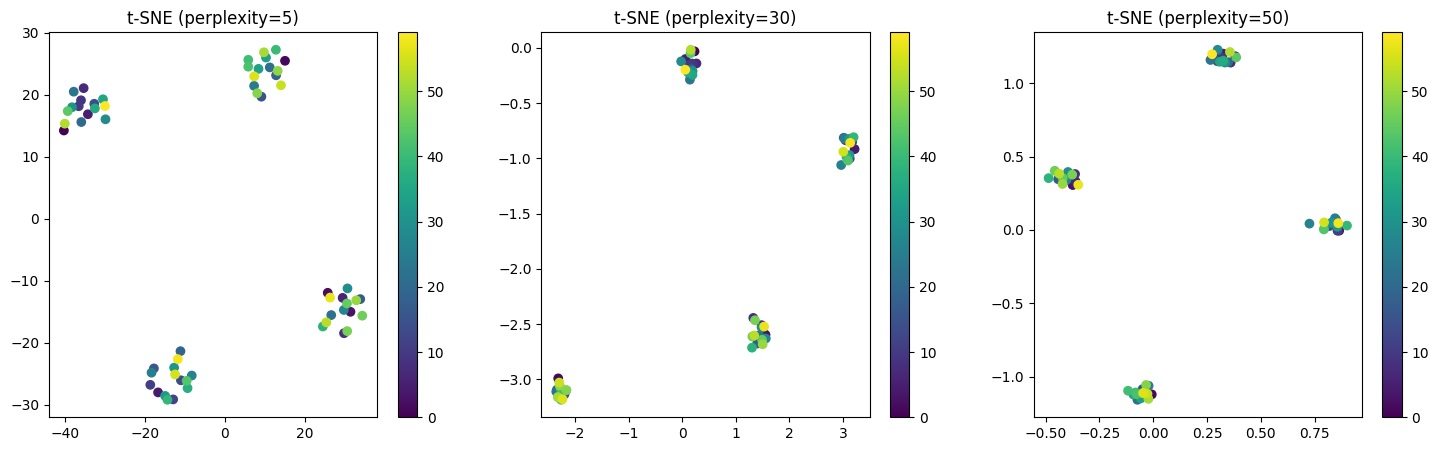

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



# Функция для выполнения t-SNE с различными уровнями перплексии
def plot_tsne(data, perplexities=[5, 30, 50], n_iter=1000):
    """
    Функция для визуализации t-SNE с различными уровнями перплексии.

    Parameters:
        data - исходные данные (n_samples x n_features)
        perplexities - список перплексий для анализа
        n_iter - количество итераций для t-SNE
    """
    plt.figure(figsize=(18, 5))

    # Применяем t-SNE для разных значений перплексии
    for i, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
        transformed_data = tsne.fit_transform(data)

        plt.subplot(1, len(perplexities), i+1)
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=np.arange(len(data)), cmap='viridis')
        plt.title(f't-SNE (perplexity={perplexity})')
        plt.colorbar()

    plt.show()

# Визуализация t-SNE с разными значениями перплексии
plot_tsne(data, perplexities=[5, 30, 50], n_iter=1000)